In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [9]:
x_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [3]:
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(50000, 1)
(10000, 1)
(10000, 32, 32, 3)


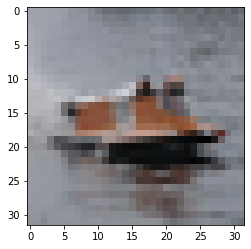

In [4]:
plt.imshow(x_train[19283])

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = y_train.reshape(-1,)
x_train = x_train / 255
x_test = x_test / 255
y_test = y_test.reshape(-1,)

In [6]:
cnn = models.Sequential([

      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D(2,2),

      layers.Flatten(),
      layers.Dense(50, activation='relu'),
      layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.5779 - accuracy: 0.4316
Epoch 2/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2263 - accuracy: 0.5682
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0954 - accuracy: 0.6200
Epoch 4/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0170 - accuracy: 0.6472
Epoch 5/5
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9677 - accuracy: 0.6631


In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [26]:
def plot_image(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    if classes[y[index]]==classes[y_test[index]]:
      print('CORRECT')
    else:
      print("WRONG")


In [16]:
y_pred

array([[1.4009750e-03, 2.4884120e-03, 9.7668394e-03, ..., 8.8158827e-03,
        4.3476380e-02, 4.0903566e-03],
       [5.1863234e-02, 3.7067652e-02, 2.7511126e-04, ..., 1.3209534e-05,
        9.0545917e-01, 5.1861587e-03],
       [4.5290168e-02, 5.7892770e-01, 9.7866422e-03, ..., 1.8469075e-03,
        2.7577490e-01, 7.6001711e-02],
       ...,
       [3.4782715e-04, 4.8617712e-05, 4.2406686e-02, ..., 2.4628341e-01,
        4.8984166e-05, 1.1103348e-03],
       [6.9926761e-02, 5.2313435e-01, 1.4771559e-02, ..., 4.9423622e-03,
        2.8902290e-03, 1.1583957e-02],
       [6.8104739e-05, 2.8657503e-04, 1.3331686e-03, ..., 9.7443783e-01,
        1.6899761e-05, 1.8034736e-04]], dtype=float32)

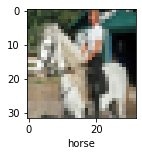

In [17]:
plot_image(x_test, y_test, 56)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 6]

CORRECT


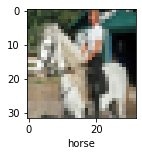

In [28]:
plot_image(x_test, y_classes, 56)

CORRECT


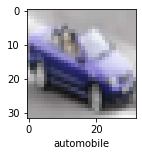

In [27]:
plot_image(x_test, y_classes, 6843)

WRONG


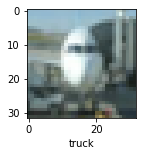

In [29]:
plot_image(x_test, y_classes, 767)

CORRECT


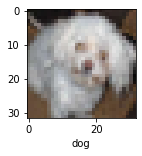

In [30]:
plot_image(x_test, y_classes, 1000)